In [3]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import wilcoxon
import numpy as np

In [4]:
models = ["mbert", "mbert-nl-clin", "bsc_bio_ehr_es"]
tasks = ["cantemist-ner"]
num_folds = 10 
results = []

for model in models:
  for task in tasks:
    for fold in range(num_folds):
        with open(f'{model}/{task}/result/predict_fold_{fold}_results.json') as f:
            fold_result = json.load(f)
            result = {
              'model': model,
              'task': task,
              'fold': fold,
              'f1': round(fold_result['predict_f1'], 3),
              'precision': fold_result['predict_precision'],
              'recall': fold_result['predict_recall'],
              'accuracy': fold_result['predict_accuracy']
            }
            results.append(result)
result_df = pd.DataFrame(results)
result_df
# result_df[result_df['model'].isin(['Clinc_nl_ro_3', 'Clinc_nl_ro_6'])]

,model,task,fold,f1,precision,recall,accuracy
0,mbert,cantemist-ner,0,0.822,0.808385,0.836485,0.991075
1,mbert,cantemist-ner,1,0.822,0.806693,0.837875,0.990613
2,mbert,cantemist-ner,2,0.826,0.815618,0.836485,0.991091
3,mbert,cantemist-ner,3,0.824,0.810484,0.838432,0.991087
4,mbert,cantemist-ner,4,0.822,0.803937,0.840378,0.991158
5,mbert,cantemist-ner,5,0.822,0.807630,0.835929,0.990746
6,mbert,cantemist-ner,6,0.818,0.805833,0.829811,0.990946
7,mbert,cantemist-ner,7,0.824,0.816840,0.830923,0.991191
8,mbert,cantemist-ner,8,0.819,0.802937,0.836207,0.990305
9,mbert,cantemist-ner,9,0.826,0.814085,0.838988,0.991008


In [5]:
def compute_ci(series, confidence=0.95):
    mean = series.mean()
    sem = stats.sem(series)
    ci = stats.t.interval(confidence, len(series)-1, loc=mean, scale=sem)
    return pd.Series({"mean": mean, "ci_low": ci[0], "ci_high": ci[1]})

ci_df = result_df.groupby("model")["precision"].apply(compute_ci).reset_index()
ci_df

,model,level_1,precision
0,bsc_bio_ehr_es,mean,0.823026
1,bsc_bio_ehr_es,ci_low,0.817923
2,bsc_bio_ehr_es,ci_high,0.828129
3,mbert,mean,0.809244
4,mbert,ci_low,0.805767
5,mbert,ci_high,0.812722
6,mbert-nl-clin,mean,0.814421
7,mbert-nl-clin,ci_low,0.812088
8,mbert-nl-clin,ci_high,0.816753


/var/folders/z2/_1pt2jfd5216hfcmv5xkx2gw0000gn/T/ipykernel_44116/944772514.py:17: UserWarning: 

The `scale` parameter is deprecated and will be removed in v0.15.0. You can now control the size of each plot element using matplotlib `Line2D` parameters (e.g., `linewidth`, `markersize`, etc.).

  sns.pointplot(data = median_df, x = 'model', y = 'f1', color = 'red', markers = 'D', scale = 1.0, join = True, linestyles = '-', errorbar = None)
/var/folders/z2/_1pt2jfd5216hfcmv5xkx2gw0000gn/T/ipykernel_44116/944772514.py:17: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0.

  sns.pointplot(data = median_df, x = 'model', y = 'f1', color = 'red', markers = 'D', scale = 1.0, join = True, linestyles = '-', errorbar = None)


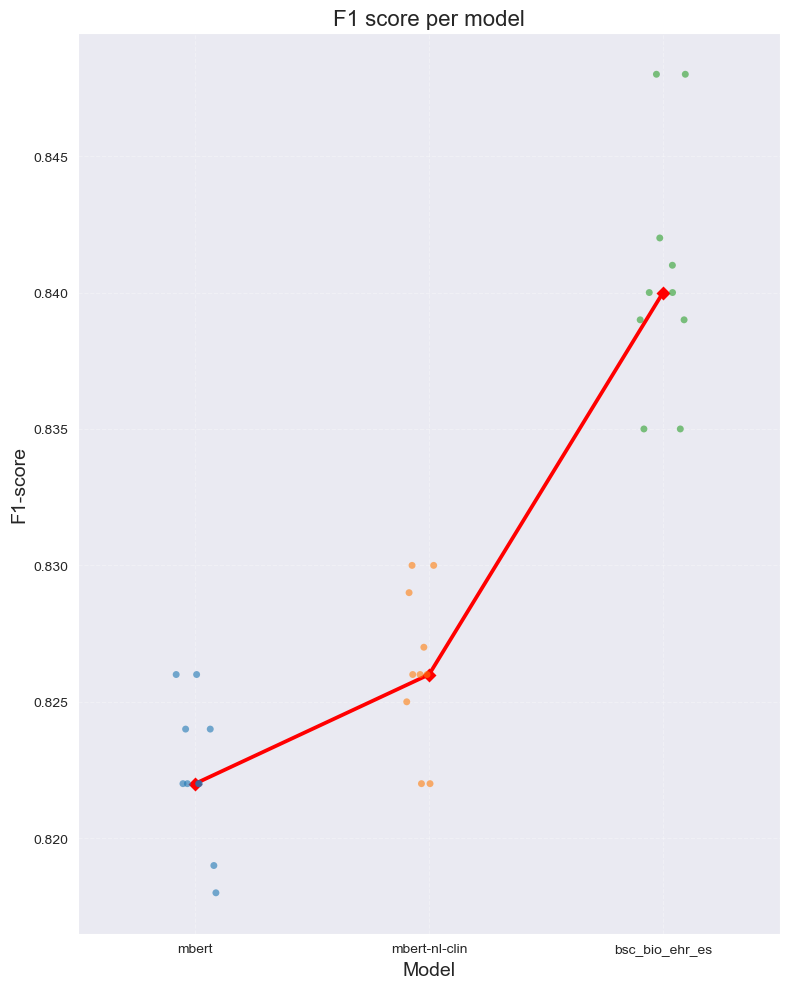

In [6]:
plt.figure(figsize = (8,10))

median_df = result_df.groupby('model', as_index = False)['f1'].median()
median_df = median_df.sort_values("f1", ascending = True)

model_order = median_df["model"].tolist()
result_df["model"] = pd.Categorical(result_df["model"], categories = model_order, ordered = True)
median_df["model"] = pd.Categorical(median_df["model"], categories = model_order, ordered = True)

sns.stripplot(data = result_df, 
              x = 'model', 
              y = 'f1', 
              hue = 'model',
              jitter = True, 
              alpha = 0.6)

sns.pointplot(data = median_df, x = 'model', y = 'f1', color = 'red', markers = 'D', scale = 1.0, join = True, linestyles = '-', errorbar = None)

plt.title("F1 score per model", fontsize = 16)
plt.xlabel("Model", fontsize = 14)
plt.ylabel("F1-score", fontsize = 14)
plt.grid(True, linestyle = '--', alpha = 0.3)

# plt.savefig("F1_per_model.png", dpi=300)
plt.tight_layout()
plt.show()

In [7]:
model_names = result_df["model"].unique()

In [8]:
models = result_df["model"].unique()
model_list = models.to_list()

p_matrix = pd.DataFrame(np.ones((len(model_list), len(model_list))), index = model_list, columns = model_list)

for m1, m2 in combinations(model_names, 2):
    f1_1 = result_df[result_df["model"] == m1].sort_values("fold")["f1"].values
    f1_2 = result_df[result_df["model"] == m2].sort_values("fold")["f1"].values

    stat, p = wilcoxon(f1_1, f1_2)
    print(f"{m1} vs {m2} → p-value = {p:.4f}")

    p_matrix.loc[m1, m2] = p
    p_matrix.loc[m2, m1] = p

p_matrix = p_matrix.round(4)
display(p_matrix)

mbert vs mbert-nl-clin → p-value = 0.0230
mbert vs bsc_bio_ehr_es → p-value = 0.0020
mbert-nl-clin vs bsc_bio_ehr_es → p-value = 0.0020


/var/folders/z2/_1pt2jfd5216hfcmv5xkx2gw0000gn/T/ipykernel_44116/2330677965.py:2: FutureWarning: Categorical.to_list is deprecated and will be removed in a future version. Use obj.tolist() instead
  model_list = models.to_list()


,mbert,mbert-nl-clin,bsc_bio_ehr_es
mbert,1.000,0.023,0.002
mbert-nl-clin,0.023,1.000,0.002
bsc_bio_ehr_es,0.002,0.002,1.000


In [9]:
models = result_df["model"].unique()
model_list = models.to_list()

p_matrix = pd.DataFrame(np.ones((len(model_list), len(model_list))), index = model_list, columns = model_list)

for m1, m2 in combinations(model_names, 2):
    f1_1 = result_df[result_df["model"] == m1].sort_values("fold")["f1"].values
    f1_2 = result_df[result_df["model"] == m2].sort_values("fold")["f1"].values

    stat, p = wilcoxon(f1_1, f1_2)
    print(f"{m1} vs {m2} → p-value = {p:.4f}")

    p_matrix.loc[m1, m2] = p
    p_matrix.loc[m2, m1] = p

p_matrix = p_matrix.round(4)
display(p_matrix)

mbert vs mbert-nl-clin → p-value = 0.0230
mbert vs bsc_bio_ehr_es → p-value = 0.0020
mbert-nl-clin vs bsc_bio_ehr_es → p-value = 0.0020


/var/folders/z2/_1pt2jfd5216hfcmv5xkx2gw0000gn/T/ipykernel_44116/2330677965.py:2: FutureWarning: Categorical.to_list is deprecated and will be removed in a future version. Use obj.tolist() instead
  model_list = models.to_list()


,mbert,mbert-nl-clin,bsc_bio_ehr_es
mbert,1.000,0.023,0.002
mbert-nl-clin,0.023,1.000,0.002
bsc_bio_ehr_es,0.002,0.002,1.000


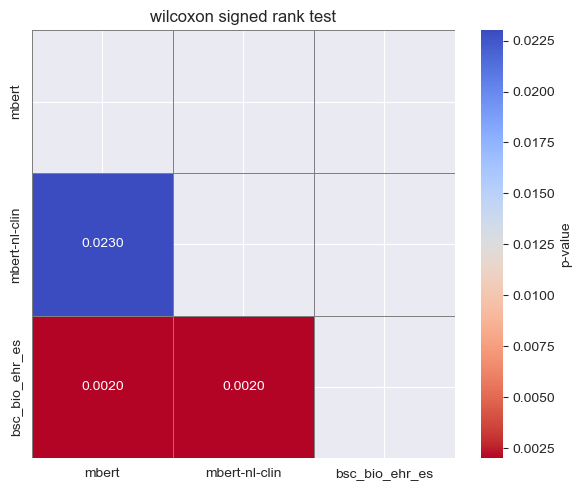

In [10]:
plt.figure(figsize = (6,5))

sns.heatmap(
    p_matrix,
    annot = True, fmt = ".4f", cmap = "coolwarm_r", cbar_kws = {'label': 'p-value'},
    linewidths = 0.5, linecolor = "grey",
    mask = np.triu(np.ones_like(p_matrix, dtype = bool))
)

plt.title("wilcoxon signed rank test")

plt.savefig("p-value.png", dpi=300)
plt.tight_layout()
plt.show()